In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
sys.path.append('../train/')
from preproc_6ax_data import load_and_preproc_data_single, resample_df
import seaborn as sns
import glob
import numpy as np
sns.set()
sns.set_style('whitegrid')
model_predict = False
import imageio

from video_reader_functions import video_reader

In [3]:
if model_predict:
    from train import build_net, load_data, train_model, reshape_function, build_cnn
    !pip install -q tensorflow==2.3.0
    import tensorflow as tf

In [4]:
ls /home/asya/Documents/cirq/Gyro_Data/LW_data/lyra

20201224_lyracontmonkeyrolls1.mp4    lyracontmonkeyrolls1.txt
20201224_lyracontmonkeyrolls2.mp4    lyracontmonkeyrolls2.txt
20201224_lyracontmonkeyrolls3.mp4    lyracontmonkeyrolls3.txt
20201224_lyraspinspeed1.mp4          lyraspinspeed1.txt
20201224_lyraspinspeed2.mp4          lyraspinspeed2.txt
20201224_lyrawindmillsNOspin.mp4     lyrawindmillsNOspin.txt
20201224_lyrawindmillspin.mp4        lyrawindmillspin.txt
DataExplanationLogLyra_20201224.txt


In [11]:
ls /home/asya/Documents/cirq/Gyro_Data/LW_data/lyra_preproc

DataExplanationLogLyra_20201224_preproc.txt  lyraspinspeed1_preproc.txt
lyracontmonkeyrolls1_preproc.txt             lyraspinspeed2_preproc.txt
lyracontmonkeyrolls2_preproc.txt             lyrawindmillsNOspin_preproc.txt
lyracontmonkeyrolls3_preproc.txt             lyrawindmillspin_preproc.txt


In [63]:
base_dir_silks = '/home/asya/Documents/cirq/Gyro_Data/LW_data/silks'
base_dir_lyra = '/home/asya/Documents/cirq/Gyro_Data/LW_data/lyra'

base_dir_silks_AK = '/home/asya/Documents/cirq/Gyro_Data/AK_data/silks_preproc/'

video_info_dict = {'1114_wheeldown1_preproc.txt':{'video':'20201224_loopdeloodrop.mp4','initframe':0,'bbox': [1050,1150,530,630],'base_dir': base_dir_silks_AK},
                   
                  'loopdeloodrop_preproc.txt':{'video':'20201224_loopdeloodrop.mp4','initframe':1824,'bbox': [1050,1150,530,630],'base_dir': base_dir_silks},
                  'saltosilksNOpancake1_preproc.txt':{'video':'20201224_saltosilksNOpancake1.mp4','initframe':2305,'bbox': [1000,1200,500,700],'base_dir': base_dir_silks},
                  'saltosilkspancake1_preproc.txt':{'video':'20201224_saltosilkspancake1.mp4','initframe':3038,'bbox': [1000,1200,500,700],'base_dir': base_dir_silks},
                  'wheeldown1_preproc.txt':{'video':'20201224_wheeldown1.mp4','initframe':390,'bbox': [1000,1200,500,700],'base_dir': base_dir_silks},
                  'wheeldown2_preproc.txt':{'video':'20201224_wheeldown2.mp4','initframe':2430,'bbox': [1000,1200,500,700],'base_dir': base_dir_silks},
                  'wheeldown3_preproc.txt':{'video':'20201224_wheeldown3.mp4','initframe':1337,'bbox': [1000,1200,500,700],'base_dir': base_dir_silks},
                  'wheeldowntest_preproc.txt':{'video':'20201224_wheeldowntest.mp4','initframe':672,'bbox': [1000,1200,500,700],'base_dir': base_dir_silks},
                  'lyrawindmillsNOspin_preproc.txt':{'video':'20201224_lyrawindmillsNOspin.mp4','initframe':945,'bbox': [1000,1200,450,650],'base_dir': base_dir_lyra},
                  'lyrawindmillspin_preproc.txt':{'video':'20201224_lyrawindmillspin.mp4','initframe':1425,'bbox': [1000,1200,450,650],'base_dir': base_dir_lyra},
                  'lyracontmonkeyrolls1_preproc.txt':{'video':'20201224_lyracontmonkeyrolls1.mp4','initframe':1706,'bbox': [1000,1200,450,650],'base_dir': base_dir_lyra},
                  'lyracontmonkeyrolls2_preproc.txt':{'video':'20201224_lyracontmonkeyrolls2.mp4','initframe':887,'bbox': [1000,1200,450,650],'base_dir': base_dir_lyra},
                  'lyracontmonkeyrolls3_preproc.txt':{'video':'20201224_lyracontmonkeyrolls3.mp4','initframe':600,'bbox': [1000,1200,450,650],'base_dir': base_dir_lyra},
                  'lyraspinspeed1_preproc.txt':{'video':'20201224_lyraspinspeed1.mp4','initframe':1206,'bbox': [1000,1200,450,650],'base_dir': base_dir_lyra},
                  'lyraspinspeed2_preproc.txt':{'video':'20201224_lyraspinspeed2.mp4','initframe':987,'bbox': [1000,1200,500,700],'base_dir': base_dir_lyra}}

## Identify first frame if necessary

In [34]:
data_fle = 'lyraspinspeed2_preproc.txt' #[a for a in video_info_dict.keys()][1]
video_fle = video_info_dict[data_fle]['video']
VR = video_reader(base_dir_lyra+'/'+video_fle,0)

In [35]:
32*30

960

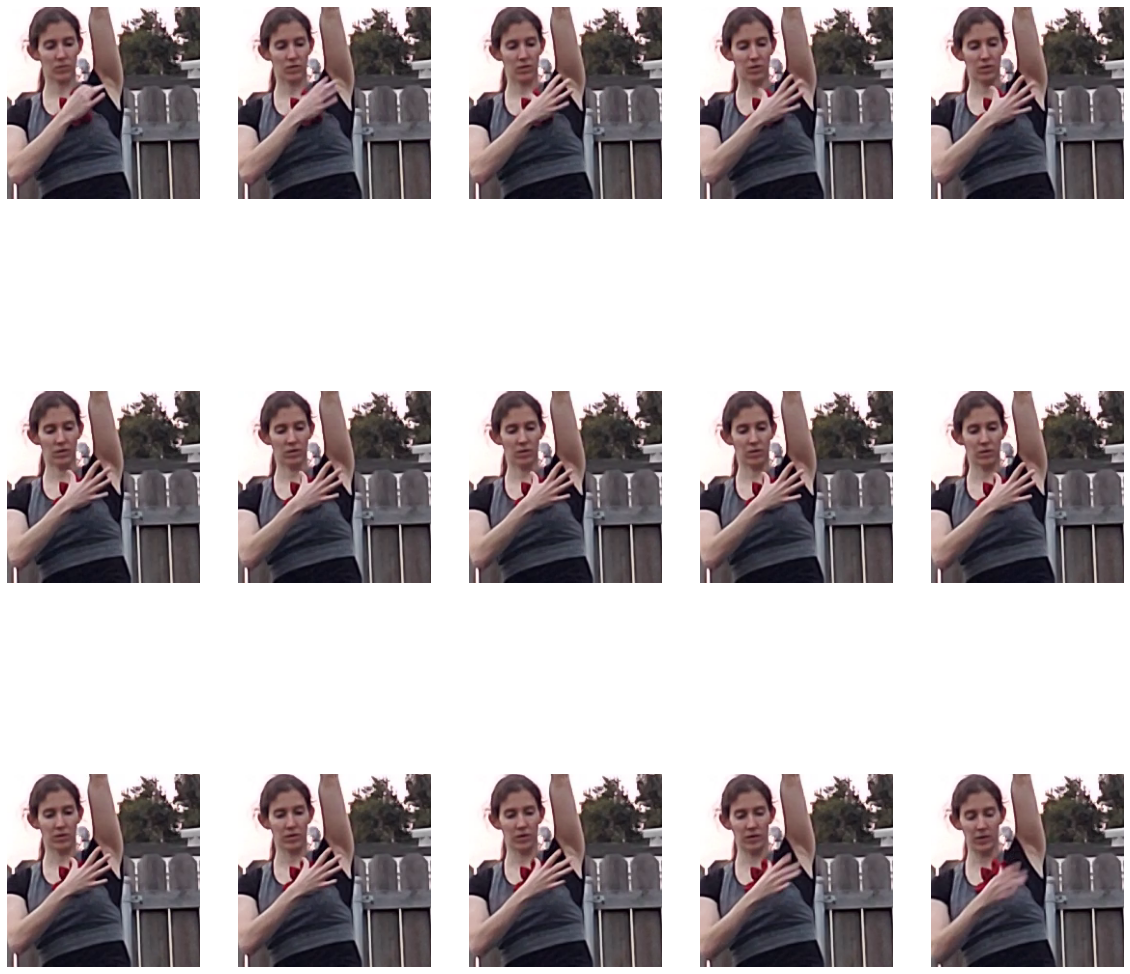

In [55]:
## Read in some of the videos to get the 'starting frame'for each
frames = VR.read_frames(986,15)
if 1:
    fig, ax = plt.subplots(3,5, figsize = (20,20))
    i = 0
    for j in range(3):
        for k in range(5):
#            ax[j,k].imshow(frames[i])
            ax[j,k].imshow(frames[i][1000:1200,450:650])
            ax[j,k].axis('off')
            i = i+1
#find_flower = frames[0][:,:,1]#-(frames[0][:,:,1]+frames[0][:,:,2])
#plt.imshow(find_flower, cmap=plt.cm.binary)
#find_flower.shape

## Now initialize the full videoreader

In [10]:
data_fle = 'wheeldown1_preproc.txt' #[a for a in video_info_dict.keys()][1]
VR = video_reader(base_dir+'/'+video_info_dict[data_fle]['video'],\
                  video_info_dict[data_fle]['initframe'],\
                  base_dir+'_preproc/'+data_fle)

In [11]:
#filename_silks = '/home/asya/Desktop/Gyro_Data/bluepy_data/testdata_preproc/1106_ctrl_test_seq1_preproc.txt'
#VR = video_reader('/home/asya/Videos/silks/1106_testseq1.mp4', 480, filename_silks, model_predict)
if model_predict:
    VR.make_model_predictions()
t_buttons = VR.get_buttons_t()

In [12]:
t_buttons

[0.0, 26.099999999999994]

In [7]:
## demo initial button press frame
frames = VR.read_frames(0, 2, limit_field = True, bbox = video_info_dict[data_fle]['bbox'])
#frames = VR.read_frames(init_frame, 2, limit_field = True,  bbox = [350,600,300,600])

fig, ax = plt.subplots(1,2, figsize = (8,7))
i = 0
ax[0].imshow(frames[i]);i = i+1; ax[0].axis('off')
ax[1].imshow(frames[i]);i = i+1; ax[1].axis('off')
fig.savefig(base_dir+'_preproc/init_frame_save_{}.png'.format(data_fle))

NameError: name 'VR' is not defined

In [57]:
import matplotlib as mpl

def makeframe(fig, frame, df_clip, t_i):
    gs = fig.add_gridspec(6,2)
    ax_v = fig.add_subplot(gs[:-2, :])
    ax_g = fig.add_subplot(gs[-2,:])
    ax_g.set_title('Gyroscope')
    ax_a = fig.add_subplot(gs[-1,:], sharex = ax_g)
    ax_a.set_title('Accel')
    
    ax_v.imshow(frame); ax_v.axis('off')

    df_clip.gx.plot(ax = ax_g, legend = 'gx')
    df_clip.gy.plot(ax = ax_g, legend = 'gy')
    df_clip.gz.plot(ax = ax_g, legend = 'gz')

    ax_g.plot([t_i,t_i],[-350,350],color = 'k')
    ax_g.set_ylabel('dps')
    ax_g.get_xaxis().set_visible(False)
    ax_g.legend(loc='upper left', prop={'size': 6})

    df_clip.ax.plot(ax =ax_a, legend = 'ax')
    df_clip.ay.plot(ax =ax_a, legend = 'ay')
    df_clip.az.plot(ax =ax_a, legend = 'az')
    ax_a.plot([t_i,t_i],[-3.5,3.5],color = 'k')
    
    tmax = np.floor(df_clip.index.max())
    ymin = -3.5
    ax_a.plot([tmax-1,tmax],[ymin,ymin],color = 'k')
    ax_a.text(tmax-.5, ymin-.5, '1 s', fontsize=10,
            verticalalignment='top')

    ax_a.set_ylabel('g')
    ax_a.legend(loc='upper left', prop={'size': 6})
    
    ax_a.get_xaxis().set_visible(False)
    
def makeframe_preds(fig, frame, df_clip, t_i):
    gs = fig.add_gridspec(7,2)
    ax_v = fig.add_subplot(gs[:-3, :])
    ax_p = fig.add_subplot(gs[-3,:])
    ax_p.set_title('Prediction')
    
    ax_g = fig.add_subplot(gs[-2,:], sharex = ax_p)
    ax_g.set_title('Gyroscope')
    ax_a = fig.add_subplot(gs[-1,:], sharex = ax_p)
    ax_a.set_title('Accel')
    
    ax_v.imshow(frame); ax_v.axis('off')

    df_clip[['p0','p1','p2','p3']].rename({'p0':'ground','p1':'silks','p2':'salto A', 'p3':'salto B'}, axis = 1).plot(ax = ax_p)
    current_color = df_clip.query('t > {} and t <{}'.format(t_i-0.02, t_i+0.001)).p_color.value_counts().index[0]
    ax_p.plot([t_i,t_i],[0,1],color = current_color)
    
    df_clip.gx.plot(ax = ax_g, legend = 'gx')
    df_clip.gy.plot(ax = ax_g, legend = 'gy')
    df_clip.gz.plot(ax = ax_g, legend = 'gz')

    ax_g.plot([t_i,t_i],[-10,350],color = 'k')
    ax_g.set_ylabel('dps')
    ax_g.get_xaxis().set_visible(False)

    df_clip.ax.plot(ax =ax_a, legend = 'ax')
    df_clip.ay.plot(ax =ax_a, legend = 'ay')
    df_clip.az.plot(ax =ax_a, legend = 'az')
    ax_a.plot([t_i,t_i],[-3.5,1],color = 'k')

    tmax = np.floor(df_clip.index.max())
    ymin = -3.5
    ax_a.plot([tmax-1,tmax],[ymin,ymin],color = 'k')
    ax_a.text(tmax-.5, ymin-.5, '1 s', fontsize=10,
            verticalalignment='top')

    ax_a.set_ylabel('g')
    ax_a.get_xaxis().set_visible(False)

In [58]:
def save_fig(fle_out, t_button, nFrames = 120):
    frames, df_clip = VR.read_data_timerange(t_button, nFrames)
    
    fig = plt.figure(figsize = (6,8), constrained_layout=True, dpi = 200)

    mpl.rcParams['axes.grid'] = False
    mpl.rcParams['axes.edgecolor'] = 'w'
    mpl.rcParams['axes.grid'] = True

    with imageio.get_writer(fle_out+'.mp4', fps=10) as writer_mp4:
        if 1:
        #with imageio.get_writer(fle_out+'.gif', mode='I') as writer_gif:
            for i in range(len(frames)):
                t_i = i/VR.get_fps()
                if model_predict:
                    makeframe_preds(fig, frames[i], df_clip, t_i)
                else:
                    makeframe(fig, frames[i], df_clip, t_i)
                fig.savefig('foo.png')
                image = imageio.imread('foo.png')
                #writer_gif.append_data(image)
                writer_mp4.append_data(image)
                plt.clf()

In [23]:
#t_vid = np.arange(0, VR.get_df().index[-1], 1/VR.get_fps())
#init_frame = np.where(t_vid > t_buttons[1])[0][0]

In [20]:
#frames, df_clip = VR.read_data_timerange(t_buttons[1], 500)
#df_clip.gx.plot()

In [ ]:
    #data_fle = 'wheeldown1_preproc.txt' #[a for a in video_info_dict.keys()][1]

fle_out = base_dir + data_fle.replace('_preproc.txt','')
save_fig(fle_out, t_buttons[1], 500)

In [85]:
for data_fle in video_info_dict:
    print(data_fle)

loopdeloodrop_preproc.txt
saltosilksNOpancake1_preproc.txt
saltosilkspancake1_preproc.txt
wheeldown1_preproc.txt
wheeldown2_preproc.txt
wheeldown3_preproc.txt
20201224_wheeldowntest.txt
initframe
bbox


In [15]:
for data_fle in video_info_dict:
    if not 'lyra' in video_info_dict[data_fle]['base_dir']:
        continue
    print(data_fle)

lyrawindmillsNOspin_preproc.txt
lyrawindmillspin_preproc.txt
lyracontmonkeyrolls1_preproc.txt
lyracontmonkeyrolls2_preproc.txt
lyracontmonkeyrolls3_preproc.txt
lyraspinspeed1_preproc.txt
lyraspinspeed2_preproc.txt


In [66]:
## Batch process the files (assume 1 button press per file)
button_idx = 0
for data_fle in ['lyrawindmillsNOspin_preproc.txt']:#,'lyrawindmillspin_preproc.txt']:
    #['lyraspinspeed2_preproc.txt','lyraspinspeed1_preproc.txt']: #video_info_dict:
    if not 'lyra' in video_info_dict[data_fle]['base_dir']:
        continue
            
    VR = video_reader(video_info_dict[data_fle]['base_dir']+'/'+video_info_dict[data_fle]['video'],\
                      video_info_dict[data_fle]['initframe'],\
                      video_info_dict[data_fle]['base_dir']+'_preproc/'+data_fle)
    
    if model_predict:
        VR.make_model_predictions()
    t_buttons = VR.get_buttons_t()
    
    if len(t_buttons)<2:
        button_idx = 0
    else:
        button_idx = 1
    
    print(VR.get_nframes()-30*t_buttons[button_idx])

    fle_out = video_info_dict[data_fle]['base_dir']+'/../'+data_fle.replace('_preproc.txt','')
    try:
        if 'wheeldown' in data_fle:
            save_fig(fle_out, t_buttons[button_idx], 500)
        elif 'lyra' in video_info_dict[data_fle]['base_dir']:
            save_fig(fle_out, t_buttons[button_idx], min(np.floor(VR.get_nframes()-30*t_buttons[button_idx]-1),800))
        else:
            save_fig(fle_out, t_buttons[button_idx], 300)
        print('DONE {}'.format(fle_out))
    except Exception as e:
        print(e)
        print('ERROR {}'.format(fle_out))

532.5
DONE /home/asya/Documents/cirq/Gyro_Data/LW_data/lyra/../lyrawindmillsNOspin


<Figure size 1200x1600 with 0 Axes>

In [27]:
t_buttons

[0.0]

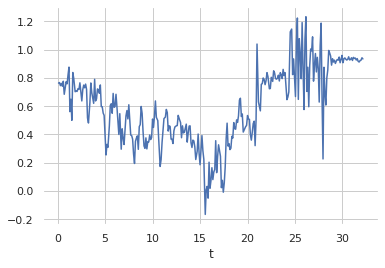

In [26]:
VR.get_df().ax.plot()

In [142]:
for t_select in range(len(t_buttons)):
    save_fig('./ctrl_preds_v1{}.gif'.format(t_select), t_buttons[t_select])

<Figure size 1200x1600 with 0 Axes>

<Figure size 1200x1600 with 0 Axes>

In [ ]:
save_fig('./ctrl_preds{}.gif'.format(4), t_buttons[4])

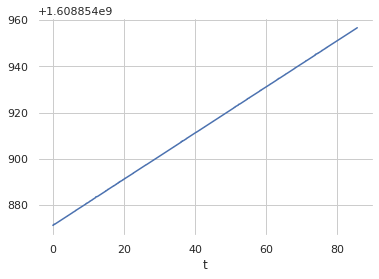

In [102]:
VR.get_df().rec_time.plot()

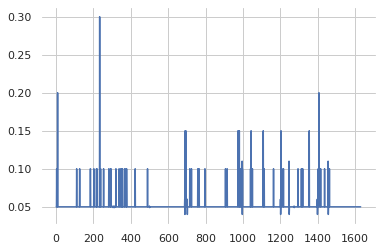

In [143]:
VR.get_df().reset_index().t.diff().plot()

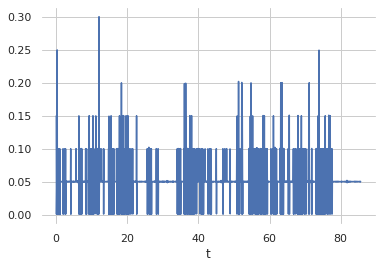

In [117]:
VR.get_df().rec_time.diff().plot()